In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
data = pd.read_csv('SBIN.BO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,130.000000,137.199997,130.000000,136.619995,46.901642,8094740.0
1,2009-05-05,136.600006,138.699997,133.500000,134.365005,46.127506,8298370.0
2,2009-05-06,134.500000,137.595001,131.000000,132.369995,45.442619,9242210.0
3,2009-05-07,133.500000,137.500000,133.035004,136.695007,46.927395,5681380.0
4,2009-05-08,136.600006,137.500000,130.600006,132.514999,45.492397,6516970.0


In [27]:
# data = data.drop('Adj Close',axis=1)
data = data.dropna()

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
# Step 1: Prepare Data
features = ['Open', 'High', 'Low', 'Volume']  # Features used for prediction
X = data[features]
y = data['Close']
X,y

(            Open        High         Low     Volume
 0     130.000000  137.199997  130.000000  8094740.0
 1     136.600006  138.699997  133.500000  8298370.0
 2     134.500000  137.595001  131.000000  9242210.0
 3     133.500000  137.500000  133.035004  5681380.0
 4     136.600006  137.500000  130.600006  6516970.0
 ...          ...         ...         ...        ...
 2634  337.799988  337.899994  332.450012   860732.0
 2635  334.899994  336.299988  332.600006   744106.0
 2636  334.500000  335.850006  332.250000   616224.0
 2637  334.850006  339.850006  333.399994   882070.0
 2638  338.000000  338.000000  332.100006   761014.0
 
 [2628 rows x 4 columns],
 0       136.619995
 1       134.365005
 2       132.369995
 3       136.695007
 4       132.514999
            ...    
 2634    334.250000
 2635    333.700012
 2636    334.350006
 2637    339.299988
 2638    333.750000
 Name: Close, Length: 2628, dtype: float64)

In [30]:
# Step 2: Train-Test Split
train_data = data[(data['Date'] >= '2009-05-04') & (data['Date'] <= '2017-04-03')]
test_data = data[(data['Date'] >= '2017-04-04') & (data['Date'] <= '2020-01-04')]

X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['Close'], test_data['Close']
X_train,X_test,y_train,y_test

(            Open        High         Low      Volume
 0     130.000000  137.199997  130.000000   8094740.0
 1     136.600006  138.699997  133.500000   8298370.0
 2     134.500000  137.595001  131.000000   9242210.0
 3     133.500000  137.500000  133.035004   5681380.0
 4     136.600006  137.500000  130.600006   6516970.0
 ...          ...         ...         ...         ...
 1957  280.000000  282.899994  278.600006   4603318.0
 1958  282.950012  289.549988  282.500000  18346220.0
 1959  288.350006  293.500000  288.149994   1974483.0
 1960  292.399994  294.250000  288.549988   2076728.0
 1961  294.299988  295.500000  291.500000   1077883.0
 
 [1954 rows x 4 columns],
             Open        High         Low     Volume
 1962  292.850006  298.649994  289.750000  2401978.0
 1963  295.700012  297.549988  291.600006  2089915.0
 1964  292.100006  294.700012  288.049988  1587699.0
 1965  289.399994  290.299988  286.500000  1215367.0
 1966  289.799988  294.500000  289.049988  1261467.0
 ...  

In [31]:
# Step 3: Model Training
rf_model = RandomForestRegressor() 
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [42]
# }

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best model from the search
# best_rf_model = grid_search.best_estimator_

# # Print the best parameters found
# print("Best Parameters:", grid_search.best_params_)

In [33]:




# Step 4: Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Step 5: Prediction (if needed)
# new_data = ...  # Your new data
# predicted_close = rf_model.predict(new_data)


Mean Absolute Error: 2.7628007738278813
Mean Squared Error: 26.480260978435034
Root Mean Squared Error: 5.145897490082272


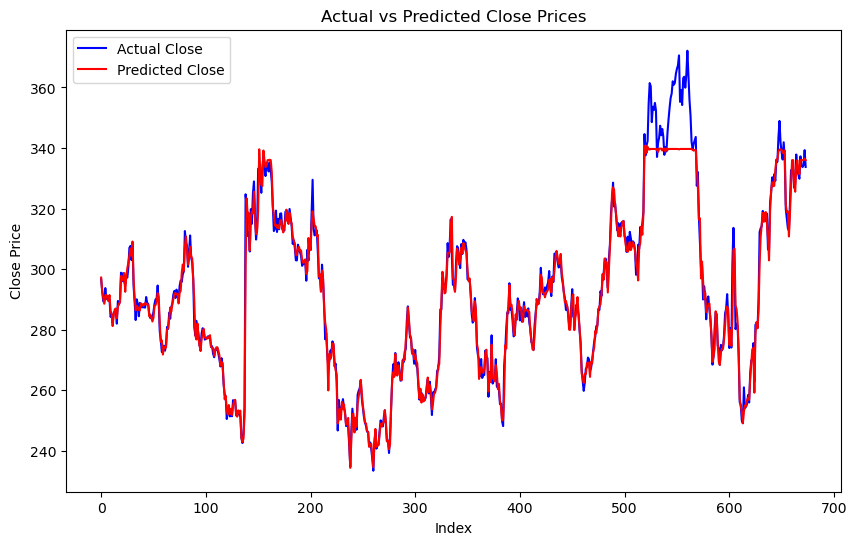

In [34]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted Close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()
